In [1]:


import numpy as np
import matplotlib.pyplot as plt


# Aprendizaje por mínimos cuadrados

In [2]:
def sse(target, predicted):
    return np.sum(np.power(target-predicted,2))

def rmse(target, predicted):
    return np.sqrt(sse(target,predicted)/len(target))

def  prom(a,b):
    return (np.sum(a))/b

def sumat(a):
    return np.sum(a)

def tht(a,b):
    return (prom(b,len(b)) - (tht1(a,b))*prom(a,len(b)))

def tht1(a,b):
    w = (len(b)*(sumat(a*b))) - ((sumat(a))*(sumat(b)))
    q = (len(b)*(sumat(a*a))) - pow((sumat(a)),2)
    return w/q


class LinearRegression():
    
    def __init__(self):
        self.w1 = None
        self.w0 = None
        
    def fit(self, x, y):
        self.w1 = tht1(x,y)
        self.w0 = tht(x,y)
        
        self.x = x
        self.y = y
        
        print("y = {}x + {}".format(self.w1, self.w0))
        print("Error = {}".format(sse(y,self.eval(x))))
    
    def eval(self, x):
        if not (self.w1 == None or self.w0 == None):
            return x*self.w1+self.w0
    

In [3]:
X = np.arange(1,8)
Y = np.array([.5, 2.5, 2, 4, 3.5, 6, 5.5])

model = LinearRegression()
#model.fit(X,Y)

#model.eval(X)
#LinearRegression()

In [4]:
model.fit(X,Y)

y = 0.8392857142857143x + 0.07142857142857117
Error = 2.991071428571428


<IPython.core.display.Javascript object>


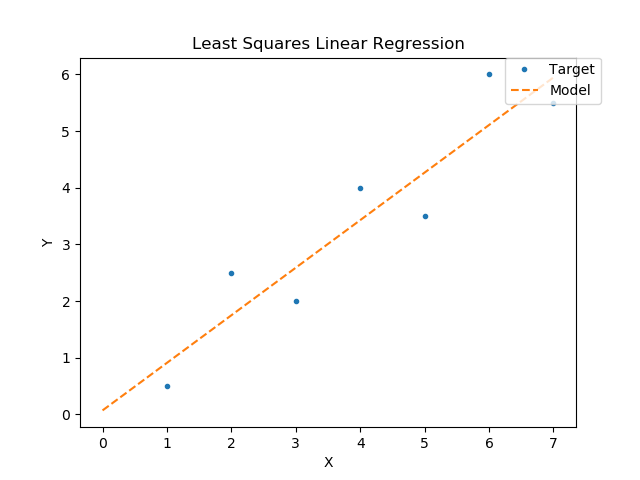

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
#fig = plt.figure()
plt.title('Least Squares Linear Regression')
plt.plot(X,Y, '.', label='Target')
plt.plot(np.arange(0,8), model.eval(np.arange(0,8)), '--', label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()

# Aprendizaje por Gradiente Descendiente

In [6]:
class LinearRegressionGD():
    def __init__(self, max_iter=1000, eta=0.0001, max_error=0.1):
        self.w1 = 0
        self.w0 = 0
        self.max_iter = max_iter
        self.eta = eta
        self.max_error = max_error
        
    def dw0(self, x, y):
        return 2*np.sum(-y+(self.w0+self.w1*x))
    
    def dw1(self, x, y):
        return 2*np.sum((y-(self.w0+self.w1*x))*-x)
    
    #Completar procedimiento para actualizar parametros
    def update(self,x,y):
        #Regla de aprendizaje
        self.w1 = self.w1 - self.eta*self.w1
        self.w0 = self.w0 - self.eta*self.w0
        pass
    
    def fit(self, x, y):
        #w = np.array([self.w0, self.w1])
        for i in range(self.max_iter):
            ym = self.eval(x)
            error = sse(y,ym)
            #print("error={}".format(error))
            if error <= self.max_error:
                break
            self.update(x,y)
        
        print("y = {}x + {}".format(self.w1, self.w0))
        print("Error = {}".format(sse(y,self.eval(x))))
        
    def eval(self, x):
        if not (self.w1 == None or self.w0 == None):
            return x*self.w1+self.w0

In [7]:
X = np.arange(1,8)
Y = np.array([.5, 2.5, 2, 4, 3.5, 6, 5.5])

modelgd = LinearRegressionGD()
modelgd.fit(X,Y)
#modelgd.eval(X)

y = 0.0x + 0.0
Error = 105.0


<IPython.core.display.Javascript object>


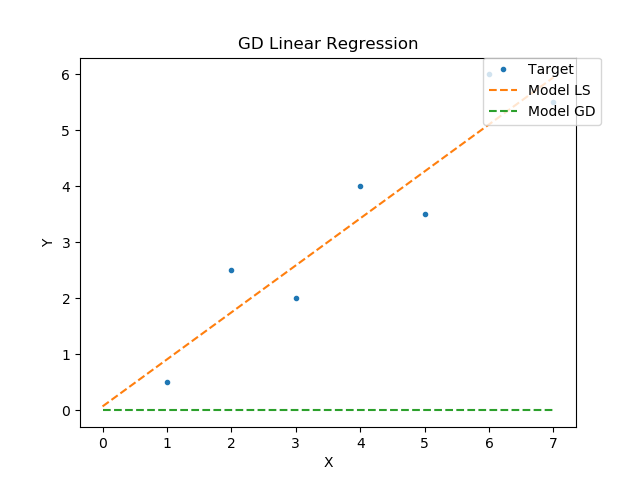

In [8]:
plt.figure()
plt.title('GD Linear Regression')
plt.plot(X,Y, '.', label='Target')
plt.plot(np.arange(0,8), model.eval(np.arange(0,8)), '--', label='Model LS')
plt.plot(np.arange(0,8), modelgd.eval(np.arange(0,8)), '--', label='Model GD')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()

In [51]:
error_rel = 100*(sse(Y,model.eval(X))-sse(Y,modelgd.eval(X)))/(sse(Y,model.eval(X)))
print("Error relativo = {}%".format(error_rel))

Error relativo = -3410.4477611940306%
